In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()

In [3]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns


<Axes: xlabel='x1', ylabel='x2'>

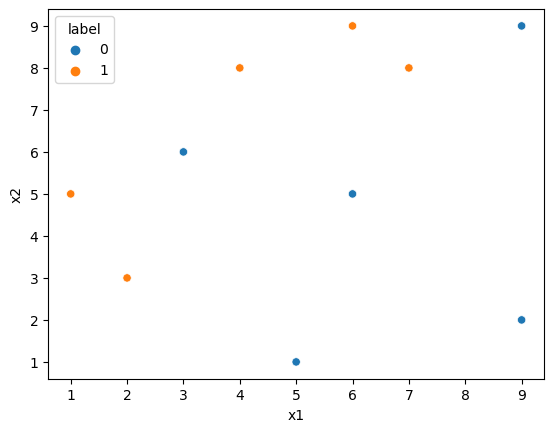

In [6]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [7]:
df['weights']=(1/df.shape[0])

In [8]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1=DecisionTreeClassifier(max_depth=1)

In [11]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [12]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [13]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [14]:
#step2---Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [15]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

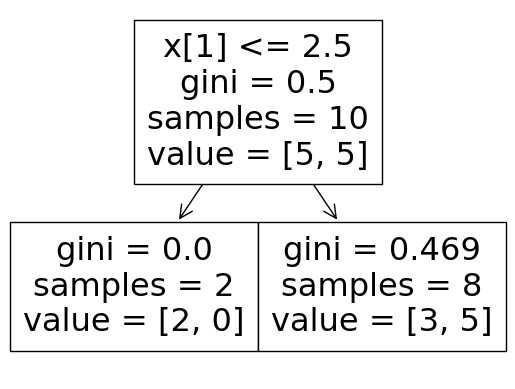

In [16]:
plot_tree(dt1)

<Axes: >

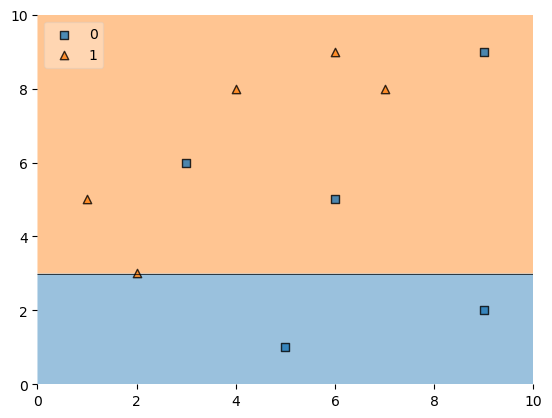

In [17]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [18]:
df['y_pred']=dt1.predict(X)

In [19]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [20]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [21]:
# step3-->calculate model weight
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [22]:
# step 4-->updating weights

def update_row_weights(row,alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)
    

In [23]:
df['Updated_weights']=df.apply(update_row_weights,axis=1)

In [24]:
df

,x1,x2,label,weights,y_pred,Updated_weights
0,1,5,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427
3,4,8,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
6,6,5,0,0.1,1,0.297427
7,7,8,1,0.1,1,0.033622
8,9,9,0,0.1,1,0.297427
9,9,2,0,0.1,0,0.033622


In [25]:
df['Updated_weights'].sum()

1.127633767363633

In [26]:
df['normalized_weights']=df['Updated_weights']/df['Updated_weights'].sum()

In [27]:
df

,x1,x2,label,weights,y_pred,Updated_weights,normalized_weights
0,1,5,1,0.1,1,0.033622,0.029816
1,2,3,1,0.1,1,0.033622,0.029816
2,3,6,0,0.1,1,0.297427,0.263762
3,4,8,1,0.1,1,0.033622,0.029816
4,5,1,0,0.1,0,0.033622,0.029816
5,6,9,1,0.1,1,0.033622,0.029816
6,6,5,0,0.1,1,0.297427,0.263762
7,7,8,1,0.1,1,0.033622,0.029816
8,9,9,0,0.1,1,0.297427,0.263762
9,9,2,0,0.1,0,0.033622,0.029816


In [28]:
df['normalized_weights'].sum()

1.0

In [29]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [30]:
df['cumsum_lower']=(df['cumsum_upper']-df['normalized_weights'])

In [31]:
df[['x1','x2','label','weights','y_pred','Updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,Updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.033622,0.000000,0.029816
1,2,3,1,0.1,1,0.033622,0.029816,0.059632
2,3,6,0,0.1,1,0.297427,0.059632,0.323395
3,4,8,1,0.1,1,0.033622,0.323395,0.353211
4,5,1,0,0.1,0,0.033622,0.353211,0.383027
5,6,9,1,0.1,1,0.033622,0.383027,0.412843
6,6,5,0,0.1,1,0.297427,0.412843,0.676605
7,7,8,1,0.1,1,0.033622,0.676605,0.706421
8,9,9,0,0.1,1,0.297427,0.706421,0.970184
9,9,2,0,0.1,0,0.033622,0.970184,1.000000


In [32]:
def create_new_dataset(df):

    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [33]:
indices_values=create_new_dataset(df)

In [34]:
second_df=df.iloc[indices_values,[0,1,2,3]]

In [35]:
second_df

,x1,x2,label,weights
6,6,5,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1


In [36]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [37]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [38]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]')]

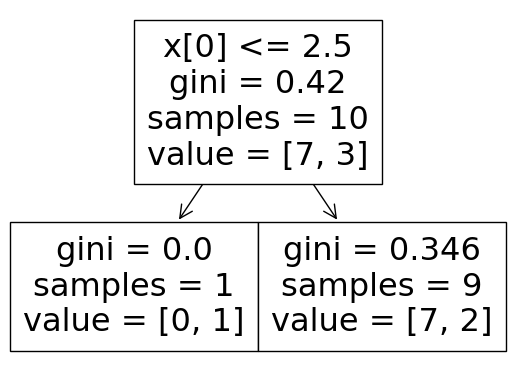

In [39]:


plot_tree(dt2)

<Axes: >

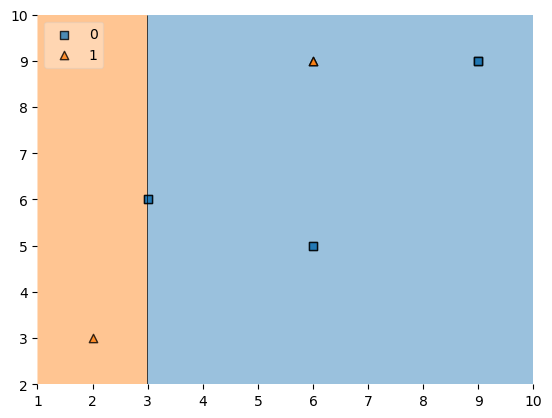

In [40]:

plot_decision_regions(X, y, clf=dt2, legend=2)

In [41]:
second_df['y_pred'] = dt2.predict(X)

In [42]:
second_df
     

,x1,x2,label,weights,y_pred
6,6,5,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
1,2,3,1,0.1,1
5,6,9,1,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0


In [43]:

alpha2 = calculate_model_weight(0.3)

In [44]:

alpha2

0.42364893019360184

In [45]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [46]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [47]:
second_df

,x1,x2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.065508
8,9,9,0,0.1,0,0.065508
2,3,6,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
8,9,9,0,0.1,0,0.065508
1,2,3,1,0.1,1,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
2,3,6,0,0.1,0,0.065508


In [48]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [49]:

second_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
6,6,5,0,0.1,0,0.065508,0.078985
8,9,9,0,0.1,0,0.065508,0.078985
2,3,6,0,0.1,0,0.065508,0.078985
5,6,9,1,0.1,0,0.152653,0.184060
8,9,9,0,0.1,0,0.065508,0.078985
8,9,9,0,0.1,0,0.065508,0.078985
1,2,3,1,0.1,1,0.065508,0.078985
5,6,9,1,0.1,0,0.152653,0.184060
6,6,5,0,0.1,0,0.065508,0.078985
2,3,6,0,0.1,0,0.065508,0.078985


In [50]:
second_df['nomalized_weights'].sum()

1.0

In [51]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [52]:

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

In [53]:
second_df[['x1','x2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.078985,0.000000,0.078985
8,9,9,0,0.1,0,0.078985,0.078985,0.157970
2,3,6,0,0.1,0,0.078985,0.157970,0.236955
5,6,9,1,0.1,0,0.184060,0.236955,0.421015
8,9,9,0,0.1,0,0.078985,0.421015,0.500000
8,9,9,0,0.1,0,0.078985,0.500000,0.578985
1,2,3,1,0.1,1,0.078985,0.578985,0.657970
5,6,9,1,0.1,0,0.184060,0.657970,0.842030
6,6,5,0,0.1,0,0.078985,0.842030,0.921015
2,3,6,0,0.1,0,0.078985,0.921015,1.000000


In [54]:
index_values = create_new_dataset(second_df)

In [55]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [56]:
third_df

,x1,x2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1


In [57]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

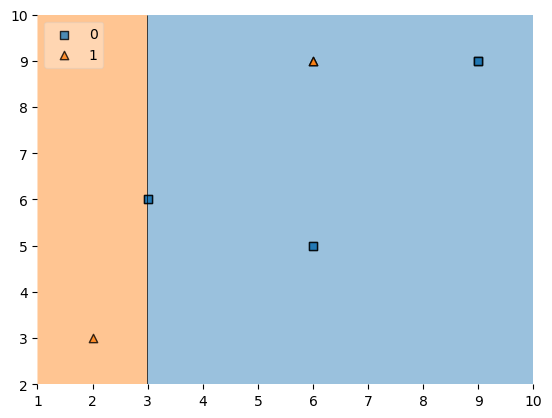

In [58]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [59]:
third_df['y_pred'] = dt3.predict(X)

In [60]:
third_df

,x1,x2,label,weights,y_pred
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
1,2,3,1,0.1,0


In [61]:
alpha3 = calculate_model_weight(0.3)
alpha3

0.42364893019360184

In [62]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.42364893019360184 0.42364893019360184


#  Prediction

In [63]:
query=np.array([2,3]).reshape(1,2)

In [64]:
dt1.predict(query)

array([1], dtype=int64)

In [65]:
dt2.predict(query)

array([1], dtype=int64)

In [66]:
dt3.predict(query)

array([1], dtype=int64)

In [67]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.2709467905808056

In [68]:
np.sign(1.27)

1.0

In [69]:
query=np.array([9,9]).reshape(1,2)

In [70]:
dt1.predict(query)

array([1], dtype=int64)

In [71]:
dt2.predict(query)

array([0], dtype=int64)

In [72]:
dt3.predict(query)

array([0], dtype=int64)

In [73]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.42364893019360184

In [74]:
np.sign(-0.423)

-1.0